In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Display the first few rows of the dataframe**

In [122]:
df = pd.read_csv("House Pricing.csv")

In [123]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


**Discretize the "age" variable into three bins: 'Young', 'Middle-aged', and 'Old'.**

In [124]:
max = df['age'].max()
min = df['age'].min()

print(f"Maximum age value: {max}")
print(f"Minimum age value: {min}")

Bins = [min, 30, 70, max]
Labels = ['Young', 'Middle-aged', 'Old']

df['DiscretizeAge'] = pd.cut(df['age'], bins = Bins, labels = Labels, right=False)

print("\n Discretized age is:")
print(df[['age', 'DiscretizeAge']].head())

Maximum age value: 100.0
Minimum age value: 2.9

 Discretized age is:
    age DiscretizeAge
0  65.2   Middle-aged
1  78.9           Old
2  61.1   Middle-aged
3  45.8   Middle-aged
4  54.2   Middle-aged


**Create a binary variable "is_charles_river" based on the "chas" column.**

In [125]:
df['is_charles_river'] = df['chas'].apply(lambda x: 1 if x == 1 else 0)

print("Dataset with the new binary variable 'is_charles_river'")
print(df[['chas', 'is_charles_river']].head())

Dataset with the new binary variable 'is_charles_river'
   chas  is_charles_river
0     0                 0
1     0                 0
2     0                 0
3     0                 0
4     0                 0


**Detect and remove outliers for each numerical column in the dataset using the Interquartile Range (IQR) method.**

In [126]:
def outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    Lower_bound = Q1 - 1.5 * IQR
    Upper_bound = Q3 + 1.5 * IQR

    CleanedData = column[(column >= Lower_bound) & (column <= Upper_bound)]
    return CleanedData

numerical_columns = df.select_dtypes(include='number').columns
WithOutliers = []
WithoutOutliers = []

for i in numerical_columns:
  WithOutliers.append(df[i].copy())
  df[i] = outliers(df[i])
  WithoutOutliers.append(df[i])

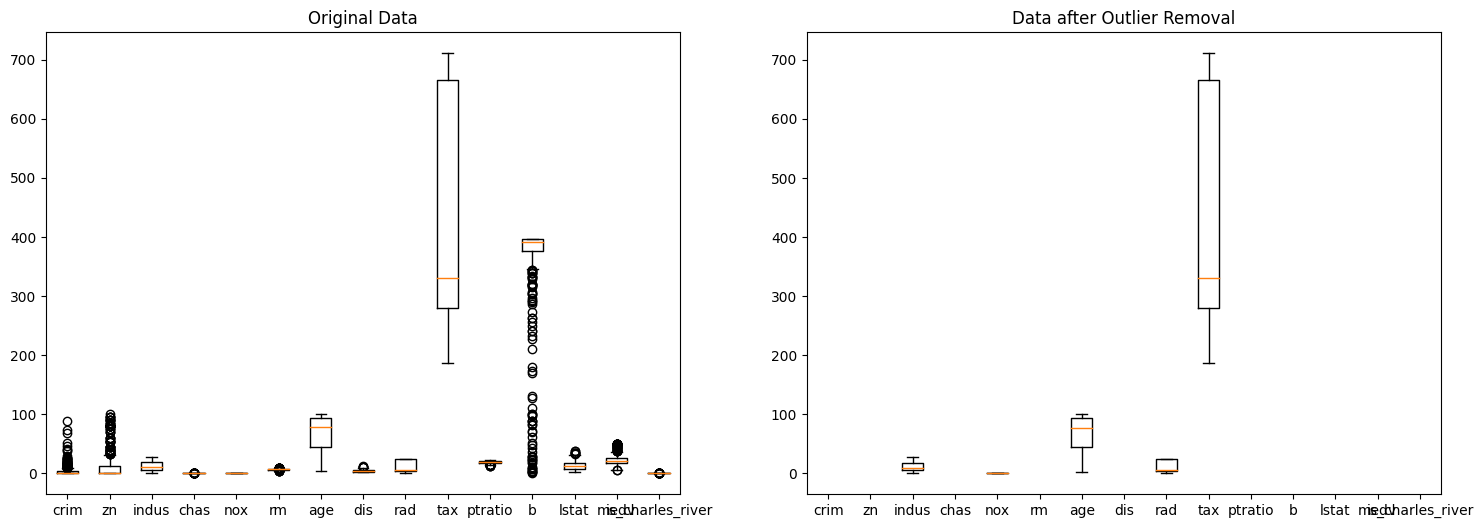

In [127]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.boxplot(WithOutliers, labels=numerical_columns)
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.boxplot(WithoutOutliers, labels=numerical_columns)
plt.title('Data after Outlier Removal')

plt.show()

**Identify and remove noisy data points from the dataset using z-score**

In [128]:
def NoisyData(df, threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    noisy_data = z_scores > threshold
    removenoise = df[~noisy_data.any(axis=1)]
    return removenoise

numericalcol = df.select_dtypes(include='number')

removenoise = NoisyData(numericalcol)

print(f"Number of rows before removing noisy data: {len(df)}")
print(f"Number of rows after removing noisy data: {len(removenoise)}")

print(removenoise.head())

Number of rows before removing noisy data: 506
Number of rows after removing noisy data: 471
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  is_charles_river  
0  396.90   4.98  24.0               0.0  
1  396.90   9.14  21.6               0.0  
2  392.83   4.03  34.7               0.0  
3  394.63   2.94  33.4               0.0  
4  396.90   5.33  36.2               0.0  


**Apply smoothing to the "rm" column and create a new smoothed column.**

In [129]:
df.dropna(subset=['rm'], inplace=True)

NoOfBins = 10

Minrm = df['rm'].min()
Maxrm = df['rm'].max()
BinWidth = (Maxrm - Minrm) / NoOfBins
BinEdges = [Minrm + i * BinWidth for i in range(NoOfBins + 1)]

def BinMean(value):
    bin_index = int((value - Minrm) // BinWidth)
    BinMean = (BinEdges[bin_index] + BinEdges[bin_index + 1]) / 2
    return BinMean

df['rm_smoothed'] = df['rm'].apply(BinMean)

print(df[['rm', 'rm_smoothed']].head())

      rm  rm_smoothed
0  6.575      6.70715
1  6.421      6.42605
2  7.185      7.26935
3  6.998      6.98825
4  7.147      7.26935


**Normalize the "tax" and "lstat" columns using Min-Max normalization.**

In [130]:
NormalizeColumns = ['tax', 'lstat']

def min_max_normalize(column):
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)

for col in NormalizeColumns:
    df[col + '_normalized'] = min_max_normalize(df[col])

print("Normalized columns:")
print(df[['tax', 'tax_normalized', 'lstat', 'lstat_normalized']].head())

Normalized columns:
   tax  tax_normalized  lstat  lstat_normalized
0  296        0.208015   4.98          0.111761
1  242        0.104962   9.14          0.254814
2  242        0.104962   4.03          0.079092
3  222        0.066794   2.94          0.041609
4  222        0.066794   5.33          0.123796


**Simple linear regression to predict the median value of "medv" based on the "rm" variable.**

In [131]:
df.dropna(subset=['medv'], inplace=True)

Regression Equation:
medv = 7.681511979912956 * rm + -26.86866038307042

Mean Squared Error: 25.620851597219232
R-squared: 0.3695582549961678 



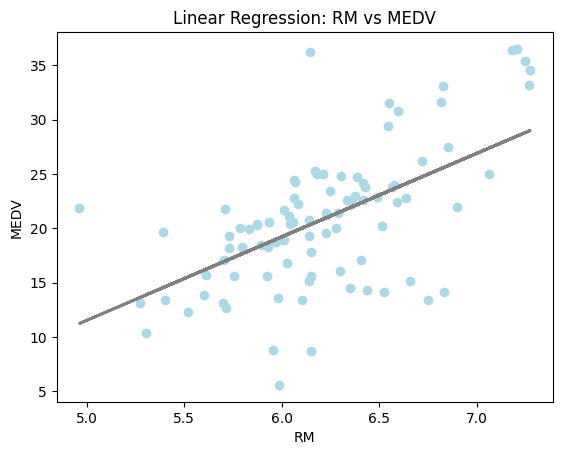

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = df[['rm']]
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

slope = model.coef_[0]
intercept = model.intercept_
print("Regression Equation:")
print("medv =", slope, "* rm +", intercept)

print("\nMean Squared Error:", mse)
print("R-squared:", r2,"\n")

plt.scatter(X_test, y_test, color='lightblue')
plt.plot(X_test, y_pred, color='gray', linewidth=2)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Linear Regression: RM vs MEDV')
plt.show()

**Relationship between "medv" and "rm," interpretations based on the regression results.**

The linear regression and the slope indicates the relationship between 'rm' and 'medv'.
By analyzing, it suggests a positive relationship between the 'rm' and 'medv'. As the 'rm' increases, the 'medv' tends to increase as well.

Since, the MSE measures the average squared difference between actual and predicted values.A lower MSE indicates a better fit of the model to the data.

R2 measures the proportion of variance in the target variable (medv) that can be explained by the predictor variable (rm).
The line does not fit best, since R-squared is 0.36